In [136]:
import cv2
import os
import numpy as np
import pickle as pk
import sys
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
# import imutils
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.svm import SVC

In [4]:
os.chdir('/Users/abhinavrohilla/Data')

In [5]:
video_direc = '/Users/abhinavrohilla/Downloads/Funny Video Clips Bollywood Movie Actress Full Prank and Comedy Moments.mp4'
celebrities = "Katrina Kaif,Ranbir Kapoor,Shraddha Kapoor,Tiger Shroff,Anushka Sharma,Sonakshi Sinha,Priyanka Chopra,Sonam Kapoor,Amitabh Bachchan,Anil Kapoor,Anupam Kher,Arbaaz Khan,Arjun Kapoor,Varun Dhawan,Alia Bhatt,Deepika Padukone,Parineeti Chopra,Tapsee Pannu,Jackquline Fernandez,Salman Khan"
celeb_list = celebrities.split(',')

In [6]:
#CONVERTING VIDEO TO IMAGES AND SAVING IN CURRENT DIRECTORY
def video_to_images(video_direc):

    vid_cap = cv2.VideoCapture(video_direc)
    os.chdir("/Users/abhinavrohilla/video_images")
    image_vec = []
    success,image = vid_cap.read()
    count = 0
    while(success==True):
        success,image = vid_cap.read()
        getvalue = vid_cap.get(0)
        if getvalue==20000:
            cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file
            image_vec.append(image)
        count += 1

In [7]:
#PARSE IMAGE FROM GOOGLE AND SAVE THEM IN CURRENT DIRECTORY
def parse_images_of_celebrities_from_google(celebrities,num_of_images):
    sys.path.append('/Users/abhinavrohilla/')
    from google_images_download.google_images_download import googleimagesdownload
    response = googleimagesdownload()
    arguments = {"keywords":celebrities,"limit":num_of_images,"print_urls":True}   #creating list of arguments
    os.chdir("/Users/abhinavrohilla/Data")
    paths = response.download(arguments)   #passing the arguments to the function

In [246]:
parse_images_of_celebrities_from_google(celebrities,90)


Item no.: 1 --> Item name = Katrina Kaif
Evaluating...
Starting Download...
Image URL: https://st1.bollywoodlife.com/wp-content/uploads/2018/08/katrina-kaif-malta.jpg
Completed Image ====> 1. katrina-kaif-malta.jpg
Image URL: https://pbs.twimg.com/profile_images/996711139189886976/gPEmgJoS.jpg
Completed Image ====> 2. gpemgjos.jpg
Image URL: https://st1.bollywoodlife.com/wp-content/uploads/2018/09/katrina-7591-e1528476683413.jpg
Completed Image ====> 3. katrina-7591-e1528476683413.jpg
Image URL: https://images.mid-day.com/images/2018/aug/Katrina-Kaif-a_d.jpg
Completed Image ====> 4. katrina-kaif-a_d.jpg
Image URL: https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=1740411316236073
URLError on an image...trying next one... Error: HTTP Error 500: Internal Server Error
Image URL: https://timesofindia.indiatimes.com/photo/65227089.cms
Completed Image ====> 5. 65227089.cms
Image URL: https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/09/14/Pictures/_e63d4442-b7db-11

Completed Image ====> 46. salman-khan-katrina-hand-holding.jpg
Image URL: https://i.pinimg.com/originals/4d/5b/80/4d5b80074c5f0cfb351c3f09c379a8f7.jpg
Completed Image ====> 47. 4d5b80074c5f0cfb351c3f09c379a8f7.jpg
Image URL: https://resize.indiatvnews.com/en/centered/oldbucket/715_431/entertainmentbollywood/IndiaTv045c20_katrina-kaif-main-pic.jpg
Completed Image ====> 48. indiatv045c20_katrina-kaif-main-pic.jpg
Image URL: http://www.freepressjournal.in/wp-content/uploads/2017/12/Alia-Bhatt-and-Katrina-Kaif-are-twinning-winning-1.jpg
Completed Image ====> 49. alia-bhatt-and-katrina-kaif-are-twinning-winning-1.jpg
Image URL: https://www.telegraphindia.com/media/images/2018/07/16/16WoodsKat4C.jpg
URLError on an image...trying next one... Error: HTTP Error 404: Not Found
Image URL: https://www.thestatesman.com/wp-content/uploads/2018/07/Katrina-Kaif.jpg
Completed Image ====> 50. katrina-kaif.jpg
Image URL: https://akm-img-a-in.tosshub.com/indiatoday/images/story/201609/katrina-kaif_647_091

Completed Image ====> 5. 220px-ranbir_kapoor_promoting_bombay_velvet.jpg
Image URL: https://st1.bollywoodlife.com/wp-content/uploads/2018/09/soni-razdan-ranbir-alia.jpg
Completed Image ====> 6. soni-razdan-ranbir-alia.jpg
Image URL: https://cdn.pinkvilla.com/files/styles/contentpreview/public/ranbir%20kapoor%20picture%20v.jpg?itok=0er9nDg7
Completed Image ====> 7. ranbir%20kapoor%20picture%20v.jpg
Image URL: https://img.timesnownews.com/story/1537342670-ranbir_kapoor_karan_johar_aamir_khan_house_0.jpg?d=600x450
Completed Image ====> 8. 1537342670-ranbir_kapoor_karan_johar_aamir_khan_house_0.jpg
Image URL: http://stat3.bollywoodhungama.in/wp-content/uploads/2018/08/Ranbir-Kapoor-doesn%E2%80%99t-care-about-politics-as-he-lives-a-luxurious-life.jpg
Completed Image ====> 9. ranbir-kapoor-doesn%e2%80%99t-care-about-politics-as-he-lives-a-luxurious-life.jpg
Image URL: http://www.freepressjournal.in/wp-content/uploads/2018/08/Ranbir-Kapoor-admits-he-wants-to-beat-the-earnings-of-Ranveer-Singh

Completed Image ====> 53. dc-cover-nk44321ickg9e4qnvc289pn6l7-20180706235906.medi.jpeg
Image URL: https://akm-img-a-in.tosshub.com/indiatoday/images/story/201809/ranbirdeepika.png?0WiRZJx.G11AIpW8Pl00_iw0kcptrnYC
Completed Image ====> 54. ranbirdeepika.png
Image URL: https://www.filmibeat.com/img/2018/06/ranbir-kapoor-tries-to-mend-fences-with-salman-khan-wants-to-do-these-films-of-superstar-1529042118.jpg
Completed Image ====> 55. ranbir-kapoor-tries-to-mend-fences-with-salman-khan-wants-to-do-these-films-of-superstar-1529042118.jpg
Image URL: https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/06/30/Pictures/antilia-filmmaker-during-mukherjee-kapoor-engagement-ranbir_8dad949c-7c4b-11e8-98f1-ed5cda4a01f0.jpg
Completed Image ====> 56. antilia-filmmaker-during-mukherjee-kapoor-engagement-ranbir_8dad949c-7c4b-11e8-98f1-ed5cda4a01f0.jpg
Image URL: https://images.indianexpress.com/2013/12/ranbir-kapoor-alia-bhatt-759.jpg
Completed Image ====> 57. ranbir-kapoor-alia-bhatt-759.jp

Completed Image ====> 8. shraddha-kapoor-2.jpg
Image URL: https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/06/24/Pictures/_2f305a6e-779e-11e8-ada9-0239ece95d2f.png
Completed Image ====> 9. _2f305a6e-779e-11e8-ada9-0239ece95d2f.png
Image URL: https://i9.dainikbhaskar.com/thumbnails/680x588/web2images/english.fashion101.in/2017/01/30/55_1485769594.jpg
Completed Image ====> 10. 55_1485769594.jpg
Image URL: https://images.mid-day.com/images/2018/apr/Shraddha-culture-story.jpg
Completed Image ====> 11. shraddha-culture-story.jpg
Image URL: https://in.bmscdn.com/iedb/artist/images/website/poster/large/shraddha-kapoor-23323-05-09-2016-10-57-46.jpg
Completed Image ====> 12. shraddha-kapoor-23323-05-09-2016-10-57-46.jpg
Image URL: https://static.langimg.com/thumb/msid-65865534,width-400,resizemode-4/shraddha.jpg
Completed Image ====> 13. shraddha.jpg
Image URL: https://i.pinimg.com/originals/c8/20/13/c82013af7fa3a143bff3960f8062309c.jpg
Completed Image ====> 14. c82013af7fa3a143b

Completed Image ====> 56. shraddhakapoor.jpg
Image URL: http://static.koimoi.com/wp-content/new-galleries/2017/04/people-dont-want-to-marry-these-days-says-shraddha-kapoor-1.jpg
Completed Image ====> 57. people-dont-want-to-marry-these-days-says-shraddha-kapoor-1.jpg
Image URL: http://content.tupaki.com//twdata/2017/0917/news/Shraddha-Kapoor-Double-Dose-In-Saaho--1504940870-1992.jpg
Completed Image ====> 58. shraddha-kapoor-double-dose-in-saaho--1504940870-1992.jpg
Image URL: https://images.financialexpress.com/2016/04/Baaghi-1.jpg
Completed Image ====> 59. baaghi-1.jpg
Image URL: https://media.gettyimages.com/photos/indian-bollywood-actress-shraddha-kapoor-poses-for-a-picture-during-a-picture-id1012635614
Completed Image ====> 60. indian-bollywood-actress-shraddha-kapoor-poses-for-a-picture-during-a-picture-id1012635614.jpg
Image URL: https://m.media-amazon.com/images/M/MV5BMTU1NzU2Nzk0MV5BMl5BanBnXkFtZTgwMzIzMzg4MjE@._V1_UX214_CR0,0,214,317_AL_.jpg
Completed Image ====> 61. mv5bmtu1n

Completed Image ====> 17. tiger-shroff-picss.jpg
Image URL: https://resize.khabarindiatv.com/resize/newbucket/715_-/2018/04/1-1522670137.jpg
Completed Image ====> 18. 1-1522670137.jpg
Image URL: https://res.cloudinary.com/firstnotify/image/upload/c_fill,d_Logo_ysxlov.jpg,f_auto,h_450,q_auto,w_300/sw8qm2v2vbwhf7brxmfa
Completed Image ====> 19. sw8qm2v2vbwhf7brxmfa.jpg
Image URL: https://resize.indiatvnews.com/en/centered/newbucket/715_431/2016/04/tiger-shroff-1461755720.jpg
Completed Image ====> 20. tiger-shroff-1461755720.jpg
Image URL: http://www.freepressjournal.in/wp-content/uploads/2018/03/Tiger-Shroff-to-take-off-to-Dehradun-for-Student-Of-The-Year-2.jpg
Completed Image ====> 21. tiger-shroff-to-take-off-to-dehradun-for-student-of-the-year-2.jpg
Image URL: https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=541498205904855
Completed Image ====> 22. ?media_id=541498205904855.jpg
Image URL: https://cdn.dnaindia.com/sites/default/files/styles/full/public/2017/02/15/548767-s

Completed Image ====> 65. ?media_id=1337480392980682.jpg
Image URL: https://qph.fs.quoracdn.net/main-qimg-333dc740376f0270c05905a73d78f2be-c
Completed Image ====> 66. main-qimg-333dc740376f0270c05905a73d78f2be-c.jpg
Image URL: https://static.toiimg.com/photo/52795962.cms
Completed Image ====> 67. 52795962.cms
Image URL: http://mum-indiacom.s3.ap-south-1.amazonaws.com/imageTopics/2278ec69dbdfb4b3e10fc8fedca35676.jpg
Completed Image ====> 68. 2278ec69dbdfb4b3e10fc8fedca35676.jpg
Image URL: https://www.ilubilu.com/ib/wp-content/uploads/2018/02/tiger-shroff-flauntng-abs.jpg
Completed Image ====> 69. tiger-shroff-flauntng-abs.jpg
Image URL: https://media.gqindia.com/wp-content/uploads/2016/10/Tiger-shroff-new-866x487.jpg
Completed Image ====> 70. tiger-shroff-new-866x487.jpg
Image URL: https://www.filmibeat.com/img/220x100x275/popcorn/profile_photos/tiger-shroff-20150911105221-31551.jpg
Completed Image ====> 71. tiger-shroff-20150911105221-31551.jpg
Image URL: https://resize.khabarindiatv.c

Completed Image ====> 19. anushka-sharma-lip-job-l.jpg
Image URL: https://media.vogue.in/wp-content/uploads/2018/08/Anushka-Sharma-in-Zara-and-Koashee-for-Sui-Dhaga-promotions-in-Jaipur-featured-1366x768.jpg
Completed Image ====> 20. anushka-sharma-in-zara-and-koashee-for-sui-dhaga-promotions-in-jaipur-featured-1366x768.jpg
Image URL: http://images.indulgexpress.com/uploads/user/imagelibrary/2018/5/1/original/anushka_sharma.jpeg
Completed Image ====> 21. anushka_sharma.jpeg
Image URL: http://ste.india.com/sites/default/files/2018/09/12/719481-anushka-meme.jpg
Completed Image ====> 22. 719481-anushka-meme.jpg
Image URL: https://m.media-amazon.com/images/M/MV5BNGM5YmYwNjUtNzQyYS00OGY0LTljZDAtMDNiMjhiOTFiMzRiXkEyXkFqcGdeQXVyMTExNDQ2MTI@._V1_UY317_CR3,0,214,317_AL_.jpg
Completed Image ====> 23. mv5bngm5ymywnjutnzqyys00ogy0ltljzdatmdnimjhiotfimzrixkeyxkfqcgdeqxvymtexndq2mti@._v1_uy317_cr3,0,214,317_al_.jpg
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Anushka_Sharma_a

Completed Image ====> 65. anushka-sharma-with-virat-kohli_0.jpeg
Image URL: https://s3-ap-south-1.amazonaws.com/cdn.odishatv.in/wp-content/uploads/2018/07/23104656/anushka-sharma.jpg
Completed Image ====> 66. anushka-sharma.jpg
Image URL: https://media.indiatimes.in/media/content/2018/Aug/anushka_sharmas_still_from_sui_dhaaga_that_has_become_a_meme_1535542046_725x725.jpg
Completed Image ====> 67. anushka_sharmas_still_from_sui_dhaaga_that_has_become_a_meme_1535542046_725x725.jpg
Image URL: https://resize.indiatvnews.com/en/resize/newbucket/715_-/2018/07/36634135-1933449310054273-7235743347875250176-n-1531294193.jpg
Completed Image ====> 68. 36634135-1933449310054273-7235743347875250176-n-1531294193.jpg
Image URL: https://images.indianexpress.com/2018/09/anushka-sharma_759.jpg
Completed Image ====> 69. anushka-sharma_759.jpg
Image URL: https://www.betrendsetter.com/wp-content/uploads/2017/03/anushka-sharma-lips-2017.jpg
Completed Image ====> 70. anushka-sharma-lips-2017.jpg
Image URL: h

Completed Image ====> 23. sonakshi-sinha-net-worth-house-cars-income-2017.jpg
Image URL: https://m.media-amazon.com/images/M/MV5BMTgxMTUyNDg2NF5BMl5BanBnXkFtZTgwOTAyMTIzOTE@._V1_UY317_CR9,0,214,317_AL_.jpg
Completed Image ====> 24. mv5bmtgxmtuyndg2nf5bml5banbnxkftztgwotaymtizote@._v1_uy317_cr9,0,214,317_al_.jpg
Image URL: https://c.tribune.com.pk/2017/10/1534627-sonakshisinha-1508319824-887-640x480.jpg
Completed Image ====> 25. 1534627-sonakshisinha-1508319824-887-640x480.jpg
Image URL: https://s3.ap-southeast-1.amazonaws.com/images.deccanchronicle.com/dc-Cover-arptmobqnrn2evq6asa0rlrhu2-20180612141732.Medi.jpeg
Completed Image ====> 26. dc-cover-arptmobqnrn2evq6asa0rlrhu2-20180612141732.medi.jpeg
Image URL: https://images.indianexpress.com/2018/04/sonakshi-sinha759-filephoto.jpg
Completed Image ====> 27. sonakshi-sinha759-filephoto.jpg
Image URL: https://st1.bollywoodlife.com/wp-content/uploads/2016/08/sobakshi-sinha-040716.jpg
Completed Image ====> 28. sobakshi-sinha-040716.jpg
Image

Completed Image ====> 70. sonakshi-sinha-hot-photo.jpg
Image URL: http://aajabhi.com/wp-content/uploads/2017/12/sonakshi-sinha.jpg
Completed Image ====> 71. sonakshi-sinha.jpg
Image URL: https://media.indiatimes.in/media/photogallery/2015/Jun/1-sonakshi-sinha-before-dabang_1435580613.jpg
Completed Image ====> 72. 1-sonakshi-sinha-before-dabang_1435580613.jpg
Image URL: http://whatsthehype.in/wp-content/uploads/2018/04/Sonakshi-Sinha.jpg
Completed Image ====> 73. sonakshi-sinha.jpg
Image URL: http://www.freepressjournal.in/wp-content/uploads/2017/03/sonakshi-sinha.jpg
Completed Image ====> 74. sonakshi-sinha.jpg
Image URL: http://ste.india.com/sites/default/files/2018/04/20/679681-sonamoviewr.gif
Completed Image ====> 75. 679681-sonamoviewr.gif
Image URL: http://media.santabanta.com/gallery/indian%20%20celebrities(f)/sonakshi%20sinha/sonakshi-sinha-229-a.jpg
Completed Image ====> 76. sonakshi-sinha-229-a.jpg
Image URL: http://exhibitmag.com/wp-content/uploads/2016/04/Exhibit-Sonakshi-Si

Completed Image ====> 29. bgus-1320402-001-1535377936.jpg
Image URL: https://s3.ap-southeast-1.amazonaws.com/images.deccanchronicle.com/dc-Cover-4ch1jtmcbe0poqp4pheaefr8f0-20180320114203.Medi.jpeg
Completed Image ====> 30. dc-cover-4ch1jtmcbe0poqp4pheaefr8f0-20180320114203.medi.jpeg
Image URL: https://www.vartatimes.com/wp-content/uploads/2018/06/X_e_ZVzy.jpg
Completed Image ====> 31. x_e_zvzy.jpg
Image URL: https://c.tribune.com.pk/2018/05/1699791-priyanka-1525165237-327-640x480.png
Completed Image ====> 32. 1699791-priyanka-1525165237-327-640x480.png
Image URL: https://pbs.twimg.com/media/DlgTYdVWwAEajH7.jpg
Completed Image ====> 33. dlgtydvwwaeajh7.jpg
Image URL: https://www.hellomagazine.com/imagenes/brides/2018081561224/priyanka-chopra-shows-off-engagement-ring-for-first-time/0-291-305/priyanka-chopra-ring-t.jpg
Completed Image ====> 34. priyanka-chopra-ring-t.jpg
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/meghan-markle-priyanka-chopra-1525319053.jpg
C

Completed Image ====> 74. priyanka-chopra-mom-quotes-about-her-nick-jonas-2018.jpg
Image URL: http://a57.foxnews.com/images.foxnews.com/content/fox-news/entertainment/2018/07/27/meghan-markle-reportedly-very-excited-about-nick-jonas-and-priyanka-chopra-engagment/_jcr_content/par/featured_image/media-0.img.jpg/931/524/1532711166006.jpg?ve=1&tl=1&text=big-top-image
Completed Image ====> 75. 1532711166006.jpg
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Priyanka_Chopra_2014.jpg/200px-Priyanka_Chopra_2014.jpg
Completed Image ====> 76. 200px-priyanka_chopra_2014.jpg
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/hbz-meghan-markle-priyanka-chopra-index-1517428600.jpg?resize=480:*
Completed Image ====> 77. hbz-meghan-markle-priyanka-chopra-index-1517428600.jpg
Image URL: https://media.allure.com/photos/5ace5397286e2c5743467f31/3:4/w_767/GettyImages-916384968.jpg
Completed Image ====> 78. gettyimages-916384968.jpg
Image URL: https://i1.wp.com/aa

Completed Image ====> 23. sonamkapoor1_1495700567_1495700574.jpg
Image URL: https://130513-387449-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2018/05/22_02_2018-sm_kp_po_1.jpg
Completed Image ====> 24. 22_02_2018-sm_kp_po_1.jpg
Image URL: https://static.toiimg.com/photo/64200638.cms
Completed Image ====> 25. 64200638.cms
Image URL: https://img.timesnownews.com/story/1536892908-Sonam.PNG?d=600x450
Completed Image ====> 26. 1536892908-sonam.png
Image URL: http://www.freepressjournal.in/wp-content/uploads/2018/05/Sonam-Kapoor-at-her-mehendi-and-sangeet-1.jpg
Completed Image ====> 27. sonam-kapoor-at-her-mehendi-and-sangeet-1.jpg
Image URL: https://130513-375933-1-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2014/05/Sonam-Kapoor.jpg
Completed Image ====> 28. sonam-kapoor.jpg
Image URL: https://cdn.dnaindia.com/sites/default/files/styles/full/public/2018/04/28/676926-sonam-kapoor-05.jpg
Completed Image ====> 29. 676926-sonam-kapoor-05.jpg
Image URL: https://cdn.telangan

Completed Image ====> 70. sonam-kapoor-mm.jpg
Image URL: https://be9bda6c0e57238eb378-426bc5385810a0e90de99e6b12d0c9f7.ssl.cf1.rackcdn.com/KurtIswarienko-SonamKapoor-C_0650RTFw.jpg
Completed Image ====> 71. kurtiswarienko-sonamkapoor-c_0650rtfw.jpg
Image URL: https://images.in.com/uploads/2018/08/s1-16.jpg?ver=0.2
Completed Image ====> 72. s1-16.jpg
Image URL: https://s3-ap-southeast-1.amazonaws.com/seenitcdn/208335931acb91a7df.jpg
Completed Image ====> 73. 208335931acb91a7df.jpg
Image URL: http://digitalspyuk.cdnds.net/13/09/980x490/landscape_bollywood-sonam-kapoor.jpg
Completed Image ====> 74. landscape_bollywood-sonam-kapoor.jpg
Image URL: http://www.freepressjournal.in/wp-content/uploads/2018/05/sonam-kapoor-2.jpg
Completed Image ====> 75. sonam-kapoor-2.jpg
Image URL: http://im.rediff.com/movies/2014/jun/09sonam-kapoor01.jpg
Completed Image ====> 76. 09sonam-kapoor01.jpg
Image URL: https://www.filmibeat.com/img/2018/05/xsonam-kapoor-ends-cold-war-with-aishwarya-rai-bachchan-will-a

Completed Image ====> 26. 280x425.jpg
Image URL: https://akm-img-a-in.tosshub.com/indiatoday/images/story/201802/amitabh.jpeg?rEwWQYeNV1nM9wkknEHp9uhviSOalNUx
Completed Image ====> 27. amitabh.jpeg
Image URL: https://cdn.dnaindia.com/sites/default/files/styles/full/public/2018/08/30/724837-amitabhbachchan-083118.jpg
Completed Image ====> 28. 724837-amitabhbachchan-083118.jpg
Image URL: https://www.radiocity.in/images/songs/album/Amitabh-Bachchan-Ultimate-Hits1511873265.jpg
Completed Image ====> 29. amitabh-bachchan-ultimate-hits1511873265.jpg
Image URL: https://130513-375933-1-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2013/09/Amitabh-Bachchan-11-Oct.jpg
Completed Image ====> 30. amitabh-bachchan-11-oct.jpg
Image URL: https://images.fonearena.com/blog/wp-content/uploads/2017/03/OnePlus-India-Amitabh-Bachchan-785x1024.jpg
Completed Image ====> 31. oneplus-india-amitabh-bachchan-785x1024.jpg
Image URL: https://cdn.pinkvilla.com/files/styles/contentpreview/public/Amitabh-Bachc

Completed Image ====> 74. cbmp-amitabh.jpg
Image URL: https://s3.ap-southeast-1.amazonaws.com/images.deccanchronicle.com/dc-Cover-artc6gil2v0dmh09bnujdngk33-20180829231144.Medi.jpeg
Completed Image ====> 75. dc-cover-artc6gil2v0dmh09bnujdngk33-20180829231144.medi.jpeg
Image URL: http://aaj.tv/wp-content/uploads/2017/06/Is-Amitabh-Bachchan-coming-960x540.png
Completed Image ====> 76. is-amitabh-bachchan-coming-960x540.png
Image URL: https://130513-375933-1-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2013/09/Amitabh-Bachchan-Madame-Tussauds.jpg
Completed Image ====> 77. amitabh-bachchan-madame-tussauds.jpg
Image URL: https://images-na.ssl-images-amazon.com/images/M/MV5BNTQwNDM3ZjMtMjk2ZC00MDJkLWEyZDAtMzgyMzlhY2RlMWNmXkEyXkFqcGdeQXVyNDUzOTQ5MjY@._CR59,36,710,532_UX614_UY460._QL50_SY230_SX307_AL_.jpg
Completed Image ====> 78. mv5bntqwndm3zjmtmjk2zc00mdjklweyzdatmzgymzlhy2rlmwnmxkeyxkfqcgdeqxvynduzotq5mjy@._cr59,36,710,532_ux614_uy460._ql50_sy230_sx307_al_.jpg
Image URL: https://

Completed Image ====> 32. cm3473645%40cartier%20polo_055.jpg
Image URL: https://resize.indiatvnews.com/en/centered/oldbucket/715_431/entertainmentbollywood/AnilKapoor.jpg
Completed Image ====> 33. anilkapoor.jpg
Image URL: https://images-na.ssl-images-amazon.com/images/M/MV5BOTI5MTMwMzY5M15BMl5BanBnXkFtZTgwMjM3OTA5MDI@._CR403,343,957,717_UX614_UY460._QL50_SY230_SX307_AL_.jpg
Completed Image ====> 34. mv5boti5mtmwmzy5m15bml5banbnxkftztgwmjm3ota5mdi@._cr403,343,957,717_ux614_uy460._ql50_sy230_sx307_al_.jpg
Image URL: http://circleofbollywood.in/wp-content/uploads/2017/04/10-Anil-Kapoor.jpg
Completed Image ====> 35. 10-anil-kapoor.jpg
Image URL: https://d1u4oo4rb13yy8.cloudfront.net/article/47946-ldzdqdqxsg-1482422841.jpg
Completed Image ====> 36. 47946-ldzdqdqxsg-1482422841.jpg
Image URL: https://images.indianexpress.com/2017/10/anil-kapoor-759.jpg
Completed Image ====> 37. anil-kapoor-759.jpg
Image URL: https://i.ytimg.com/vi/P8fQrx1KBvo/hqdefault.jpg
Completed Image ====> 38. hqdefault

Completed Image ====> 81. anil-kapoor-dil-dhadakne-do.jpg
Image URL: https://c8.alamy.com/comp/BH33NR/anil-kapoor-indian-film-actor-in-november-2009-BH33NR.jpg
Completed Image ====> 82. anil-kapoor-indian-film-actor-in-november-2009-bh33nr.jpg
Image URL: http://awallpapersimages.com/wp-content/uploads/2016/07/Anil-Kapoor-Bollywood-Actors-1.jpg
Completed Image ====> 83. anil-kapoor-bollywood-actors-1.jpg
Image URL: http://www.tellychakkar.com/sites/www.tellychakkar.com/files/styles/display_665x429/public/images/movie_image/2018/04/02/Anil%20kapoor.jpg?itok=GYiFcmMZ
Completed Image ====> 84. anil%20kapoor.jpg
Image URL: http://media2.bollywoodhungama.in/wp-content/uploads/2018/06/%E2%80%9CI-made-sure-Anand-Ahuja-was-my-friend%E2%80%9D-Anil-Kapoor.jpg
Completed Image ====> 85. %e2%80%9ci-made-sure-anand-ahuja-was-my-friend%e2%80%9d-anil-kapoor.jpg
Image URL: https://i.ndtvimg.com/i/2017-10/anil-kapoor-instagram_650x400_81507211376.jpg
Completed Image ====> 86. anil-kapoor-instagram_650x40

Completed Image ====> 40. anupamkher3.jpg
Image URL: https://akm-img-a-in.tosshub.com/indiatoday/images/story/201603/anupam-kher-story_647_11_031116014421.jpg
Completed Image ====> 41. anupam-kher-story_647_11_031116014421.jpg
Image URL: http://magnamags.com/upload/articles/society_anupamkher__0023_cmyk188908.jpg
Completed Image ====> 42. society_anupamkher__0023_cmyk188908.jpg
Image URL: https://data1.ibtimes.co.in/cache-img-0-450/en/full/664821/1507722327_anupam-kher.jpg
Completed Image ====> 43. 1507722327_anupam-kher.jpg
Image URL: https://images.hindi.news18.com/ibnkhabar/uploads/459x306/jpg/2017/10/anupam-kher.png
Completed Image ====> 44. anupam-kher.png
Image URL: https://static.gulfnews.com/polopoly_fs/1.981194!/image/2758029931.jpg_gen/derivatives/box_460346/2758029931.jpg
Completed Image ====> 45. 2758029931.jpg
Image URL: https://images.indianexpress.com/2017/05/23saaransh2.jpg
Completed Image ====> 46. 23saaransh2.jpg
Image URL: http://images.catchnews.com/upload/2017/05/1

Starting Download...
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Arbaaz_Khan_at_his_birthday_bash_at_Su_Casa.jpg/220px-Arbaaz_Khan_at_his_birthday_bash_at_Su_Casa.jpg
Completed Image ====> 1. 220px-arbaaz_khan_at_his_birthday_bash_at_su_casa.jpg
Image URL: https://cdn.dnaindia.com/sites/default/files/styles/full/public/2018/06/01/688681-560580-arbaaz-khan.jpg
Completed Image ====> 2. 688681-560580-arbaaz-khan.jpg
Image URL: https://img.etimg.com/thumb/msid-64417745,width-643,imgsize-46667,resizemode-4/arbaaz-khan_bccl.jpg
Completed Image ====> 3. arbaaz-khan_bccl.jpg
Image URL: https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/06/01/Pictures/hindustan-profile-exclusively-bollywood-meridian-hindustan-indian_340d0970-6587-11e8-a998-12ee0acfa260.jpg
Completed Image ====> 4. hindustan-profile-exclusively-bollywood-meridian-hindustan-indian_340d0970-6587-11e8-a998-12ee0acfa260.jpg
Image URL: https://m.media-amazon.com/images/M/MV5BYTYzMzA2MjMtYTU3Ni00Y

Completed Image ====> 47. arbaz-khan-600x337.jpeg
Image URL: https://usupdates.com/wp-content/uploads/2018/09/Arbaaz-Khan-and-Girlfriend-Georgia-Andriani.jpg
Completed Image ====> 48. arbaaz-khan-and-girlfriend-georgia-andriani.jpg
Image URL: https://www.bollywoodshaadis.com/img/article-l-2018822710014236102000.jpg
Completed Image ====> 49. article-l-2018822710014236102000.jpg
Image URL: https://img.timesnownews.com/story/1527968279-malaika_arbaaz.JPG?d=600x450
Completed Image ====> 50. 1527968279-malaika_arbaaz.jpg
Image URL: https://d218kegnl5or7l.cloudfront.net/wp-content/uploads/2014/10/Arbaaz-Khan-wife.jpg
Completed Image ====> 51. arbaaz-khan-wife.jpg
Image URL: https://www.emirates247.com/polopoly_fs/1.551274.1452539723!/image/image.jpg
Completed Image ====> 52. image.jpg
Image URL: https://images.abplive.in/index.php?url=http://static.abplive.in/wp-content/uploads/2018/06/02124234/arbaaz.jpg&dimension=0:480&action=resize&convertTo=jpeg
Completed Image ====> 53. ar
Image URL: ht

Completed Image ====> 5. 1537187382-arjun_kapoor_new.jpg
Image URL: https://static.toiimg.com/photo/msid-65773423/65773423.jpg?46248
Completed Image ====> 6. 65773423.jpg
Image URL: https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/09/18/Pictures/_041523ee-bb52-11e8-aa2b-bfb0450a5721.jpg
Completed Image ====> 7. _041523ee-bb52-11e8-aa2b-bfb0450a5721.jpg
Image URL: https://static.toiimg.com/photo/65420233.cms
Completed Image ====> 8. 65420233.cms
Image URL: https://images.indianexpress.com/2018/06/arjun-kapoor-7591.jpg
Completed Image ====> 9. arjun-kapoor-7591.jpg
Image URL: http://www.india.com/wp-content/uploads/2018/04/Arjun-Kapoor.jpg
Completed Image ====> 10. arjun-kapoor.jpg
Image URL: https://akm-img-a-in.tosshub.com/indiatoday/images/story/201809/arjun_parineeti_1.jpeg?xclglcY3K9.V6ixo3XL2yi74YvX.tnjO
Completed Image ====> 11. arjun_parineeti_1.jpeg
Image URL: http://stat3.bollywoodhungama.in/wp-content/uploads/2018/02/Arjun-Kapoor-to-visit-Punjab-for-the-first-ti

Completed Image ====> 56. maxresdefault.jpg
Image URL: https://media.gettyimages.com/photos/bollywood-star-arjun-kapoor-attends-a-photocall-for-the-bollywood-picture-id652003798?s=612x612
Completed Image ====> 57. bollywood-star-arjun-kapoor-attends-a-photocall-for-the-bollywood-picture-id652003798?s=612x612.jpg
Image URL: http://ste.india.com/sites/default/files/2018/04/13/677475-arju-copy.jpg
Completed Image ====> 58. 677475-arju-copy.jpg
Image URL: https://images.indianexpress.com/2016/03/arjun-john-759.jpg
Completed Image ====> 59. arjun-john-759.jpg
Image URL: https://i.ndtvimg.com/i/2017-04/arjun-kapoor_640x480_51491896236.jpg
Completed Image ====> 60. arjun-kapoor_640x480_51491896236.jpg
Image URL: https://www.bollywoo.ooo/media/catalog/product/cache/1/thumbnail/600x600/17f82f742ffe127f42dca9de82fb58b1/a/r/arjun-kapoor-stratum-shirt-half-girlfriend-actor_1.jpg
Completed Image ====> 61. arjun-kapoor-stratum-shirt-half-girlfriend-actor_1.jpg
Image URL: https://pbs.twimg.com/profil

Completed Image ====> 18. varunda1.jpg
Image URL: https://resize.indiatvnews.com/en/centered/newbucket/715_431/2017/12/270-1512265815.jpg
Completed Image ====> 19. 270-1512265815.jpg
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Varun_Dhawan_Stardust_Conference.jpg/220px-Varun_Dhawan_Stardust_Conference.jpg
Completed Image ====> 20. 220px-varun_dhawan_stardust_conference.jpg
Image URL: http://stat3.bollywoodhungama.in/wp-content/uploads/2017/11/SCOOP-Varun-Dhawan-ups-his-price-by-Rs.-5-crores.jpg
Completed Image ====> 21. scoop-varun-dhawan-ups-his-price-by-rs.-5-crores.jpg
Image URL: https://akm-img-a-in.tosshub.com/indiatoday/images/story/201803/varun_6.jpeg?3K7XTFOIi7tsRvJEk6bzbMPLd4kzfOSN
Completed Image ====> 22. varun_6.jpeg
Image URL: https://i.pinimg.com/originals/74/e0/2d/74e02de7d76e2bc55f00c7119dc65c48.jpg
Completed Image ====> 23. 74e02de7d76e2bc55f00c7119dc65c48.jpg
Image URL: https://st1.bollywoodlife.com/wp-content/uploads/2017/03/varun-dhawan.jpg


Completed Image ====> 70. varun_dhawan_filmfare.jpg
Image URL: https://www.indiablooms.com/life_pic/2014/VARUN1-1400730030.jpg
Completed Image ====> 71. varun1-1400730030.jpg
Image URL: https://c.tribune.com.pk/2017/09/1509017-varunnnnnnnn-1505637885-614-640x480.jpg
Completed Image ====> 72. 1509017-varunnnnnnnn-1505637885-614-640x480.jpg
Image URL: http://images.asianage.com/images/aa-Cover-6g98slub5mf36hjul7r8te5lu6-20180613224719.Medi.jpeg
Completed Image ====> 73. aa-cover-6g98slub5mf36hjul7r8te5lu6-20180613224719.medi.jpeg
Image URL: http://img.en.eenaduindia.com/Article/201809182051053683_Varun-Dhawan-meets-real-life-hero_SECVPF.gif
Completed Image ====> 74. 201809182051053683_varun-dhawan-meets-real-life-hero_secvpf.gif
Image URL: https://i.ndtvimg.com/i/2017-09/varun-dhawan-instagram_640x480_51504498053.jpg
Completed Image ====> 75. varun-dhawan-instagram_640x480_51504498053.jpg
Image URL: http://ste.india.com/sites/default/files/2016/08/22/521663-varun-dv-are.jpg
Completed Ima

Completed Image ====> 29. 1aliabhatt3statesmoviestill.jpg
Image URL: https://resize.indiatvnews.com/en/resize/newbucket/715_-/2018/08/alia-bhatt-3-1-1535630627.jpg
Completed Image ====> 30. alia-bhatt-3-1-1535630627.jpg
Image URL: https://s3.ap-southeast-1.amazonaws.com/images.deccanchronicle.com/dc-Cover-48680ol5880v144j4e5be00gj5-20180209204237.Medi.jpeg
Completed Image ====> 31. dc-cover-48680ol5880v144j4e5be00gj5-20180209204237.medi.jpeg
Image URL: https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/09/19/Pictures/_f6a3a2f6-bbee-11e8-8a71-2e69120e7585.JPG
Completed Image ====> 32. _f6a3a2f6-bbee-11e8-8a71-2e69120e7585.jpg
Image URL: http://elle.in/assets/Uploads/alia-bhatt-heart.jpg
Completed Image ====> 33. alia-bhatt-heart.jpg
Image URL: https://s13768.pcdn.co/wp-content/new-galleries/2018/08/ive-pretty-much-got-used-to-media-attention-alia-bhatt-01.jpg
Completed Image ====> 34. ive-pretty-much-got-used-to-media-attention-alia-bhatt-01.jpg
Image URL: https://lookaside

Completed Image ====> 79. featimg-alia-bhatt-birthday-raazi-1.jpg
Image URL: http://images.catchnews.com/upload/2016/06/24/alia-bhatt-cute-main_730x419.jpeg
Completed Image ====> 80. alia-bhatt-cute-main_730x419.jpeg
Image URL: https://cdn.pinkvilla.com/files/styles/contentpreview/public/alia_proposeonfilmset.jpg?itok=snpMD67_
Completed Image ====> 81. alia_proposeonfilmset.jpg
Image URL: https://cdn-live.theprint.in/wp-content/uploads/2018/07/alia-bhatt.jpg
Completed Image ====> 82. alia-bhatt.jpg
Image URL: https://bloximages.chicago2.vip.townnews.com/indiawest.com/content/tncms/assets/v3/editorial/1/b1/1b15be02-53a4-11e8-a0d4-e3ce4fc15272/5af31ec993679.image.jpg
Completed Image ====> 83. 5af31ec993679.image.jpg
Image URL: https://www.wiseshe.com/wp-content/uploads/2014/12/makeup-tips-by-Alia-Bhatt.jpg
Completed Image ====> 84. makeup-tips-by-alia-bhatt.jpg
Image URL: https://images.jdmagicbox.com/events/A259705/A259705_gal_20180315170218.jpg
Completed Image ====> 85. a259705_gal_201

Completed Image ====> 39. deepika-padukone.jpg
Image URL: http://www.india.com/wp-content/uploads/2018/06/deepika-padukone.jpg
Completed Image ====> 40. deepika-padukone.jpg
Image URL: https://i.ytimg.com/vi/ChS2Yhg7hUI/maxresdefault.jpg
Completed Image ====> 41. maxresdefault.jpg
Image URL: https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=2200212930052798
Completed Image ====> 42. ?media_id=2200212930052798.jpg
Image URL: https://cdn.dnaindia.com/sites/default/files/styles/full/public/2018/05/20/684466-247597-deepikapadukone2.jpg
Completed Image ====> 43. 684466-247597-deepikapadukone2.jpg
Image URL: https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/08/15/Pictures/deepika-padukone-at-madame-tussauds_ae8f7776-a071-11e8-8fb2-666c968f5d36.jpg
Completed Image ====> 44. deepika-padukone-at-madame-tussauds_ae8f7776-a071-11e8-8fb2-666c968f5d36.jpg
Image URL: https://timesofindia.indiatimes.com/photo/60956683.cms
Completed Image ====> 45. 60956683.cms
Image URL: htt

Completed Image ====> 87. deepika-padukone-70th-annual-cannes-film-festival.jpg
Image URL: http://gdtmedia.india.com/data/topics/image/6/34476/8473dd80ab3b9d52a5bea309cf746ca2_org_225X300_1.jpg
IOError on an image...trying next one... Error: timed out
Image URL: https://www.masala.com/sites/default/files/styles/gallery_slideshow_cache_734/public/images/2018/01/29/MAIN_0.jpg?itok=A0T3E7xK
Completed Image ====> 88. main_0.jpg
Image URL: http://mum-indiacom.s3.ap-south-1.amazonaws.com/imageTopics/1ce2e2d4a3ffa4d39d2f45c5ae275c06.jpg
Completed Image ====> 89. 1ce2e2d4a3ffa4d39d2f45c5ae275c06.jpg
Image URL: https://media0.mensxp.com/media/content/2018/Jun/deepika-already-knew-about-ranbir-amp-alia-dating1400-1527864905_1100x513.jpg
Completed Image ====> 90. deepika-already-knew-about-ranbir-amp-alia-dating1400-1527864905_1100x513.jpg

Errors: 1


Item no.: 17 --> Item name = Parineeti Chopra
Evaluating...
Starting Download...
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/a

Completed Image ====> 42. main-qimg-4f69e52bd4e679ec17d364eb0fc98f49-c.jpg
Image URL: https://i.pinimg.com/originals/60/5f/d4/605fd4cf5edc5e327101e7678b179386.jpg
Completed Image ====> 43. 605fd4cf5edc5e327101e7678b179386.jpg
Image URL: http://www.bollywoodlife.com/wp-content/uploads/2014/09/parineeti.jpg
Completed Image ====> 44. parineeti.jpg
Image URL: https://akm-img-a-in.tosshub.com/indiatoday/images/story/201707/parineeti-story_647_070117113513.jpg
Completed Image ====> 45. parineeti-story_647_070117113513.jpg
Image URL: https://www.bollywood.com/sites/default/files/styles/inner_image/public/parineetichoprabanner7_4.jpg?itok=3jSf_XKX
Completed Image ====> 46. parineetichoprabanner7_4.jpg
Image URL: https://bloximages.chicago2.vip.townnews.com/indiawest.com/content/tncms/assets/v3/editorial/b/73/b73f827a-f320-11e7-813e-cbd3f4dd9dc9/5a5132be97821.image.jpg
Completed Image ====> 47. 5a5132be97821.image.jpg
Image URL: https://www.filmibeat.com/img/220x100x275/popcorn/profile_photos/p

Starting Download...
Image URL: https://130513-375933-1-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2015/01/Taapsee-Pannu.jpg
Completed Image ====> 1. taapsee-pannu.jpg
Image URL: https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=143514902411882
Completed Image ====> 2. ?media_id=143514902411882.jpg
Image URL: https://static.toiimg.com/photo/62494816.cms
Completed Image ====> 3. 62494816.cms
Image URL: http://media2.bollywoodhungama.in/wp-content/uploads/2017/08/Nepotism-controversy-continues-Taapsee-Pannu-clarifies-on-Nepotism-post-that-was-shared-last-year.jpg
Completed Image ====> 4. nepotism-controversy-continues-taapsee-pannu-clarifies-on-nepotism-post-that-was-shared-last-year.jpg
Image URL: https://www.telugu360.com/wp-content/uploads/2018/09/I-have-no-fear-of-failure-Taapsee-Pannu.jpg
Completed Image ====> 5. i-have-no-fear-of-failure-taapsee-pannu.jpg
Image URL: http://www.viralindiandiary.com/wp-content/uploads/2018/05/tapsee-pannu.jpg
Completed Image =

Completed Image ====> 48. taapsee-pannu.jpg
Image URL: https://img.timesnownews.com/story/tap.gif?d=600x450
Completed Image ====> 49. tap.gif
Image URL: https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/03/05/Pictures/taapsee-pannu_1de0bc8a-203d-11e8-8baa-23f2d497fa41.jpg
Completed Image ====> 50. taapsee-pannu_1de0bc8a-203d-11e8-8baa-23f2d497fa41.jpg
Image URL: http://media1.bollywoodhungama.in/wp-content/uploads/2018/09/%E2%80%9CNow-I-know-where-I-am-going-with-my-career%E2%80%9D-Taapsee-Pannu.jpg
Completed Image ====> 51. %e2%80%9cnow-i-know-where-i-am-going-with-my-career%e2%80%9d-taapsee-pannu.jpg
Image URL: https://pbs.twimg.com/profile_images/967271945250189312/_br0OM_1_400x400.jpg
Completed Image ====> 52. _br0om_1_400x400.jpg
Image URL: https://media.gettyimages.com/photos/actress-taapsee-pannu-attends-the-2017-international-indian-film-at-picture-id815322002?s=612x612
Completed Image ====> 53. actress-taapsee-pannu-attends-the-2017-international-indian-film-at-p

Completed Image ====> 3. 220px-jacqueline_lee-jeans_2.jpg
Image URL: https://timesofindia.indiatimes.com/thumb/msid-64538003,width-400,resizemode-4/64538003.jpg?imglength=184969
Completed Image ====> 4. 64538003.jpg
Image URL: https://c.tribune.com.pk/2018/06/1732686-jac_indianexpress-1528711546-810-640x480.jpg
Completed Image ====> 5. 1732686-jac_indianexpress-1528711546-810-640x480.jpg
Image URL: https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/03/24/Pictures/jacqueline-fernandez-asiaspa-20140501-raajessh-bollywood-actress_68c2fb6c-2f3a-11e8-8732-87a46da2a8cc.jpg
Completed Image ====> 6. jacqueline-fernandez-asiaspa-20140501-raajessh-bollywood-actress_68c2fb6c-2f3a-11e8-8732-87a46da2a8cc.jpg
Image URL: https://cdn.dnaindia.com/sites/default/files/styles/full/public/2018/06/09/691425-jacqueline-fernandez-eye.jpg
Completed Image ====> 7. 691425-jacqueline-fernandez-eye.jpg
Image URL: https://bizasialivecom-6bb5.kxcdn.com/wp-content/uploads/2017/08/Jacqueline-Fernandez-A-

Completed Image ====> 49. jacqueline-fernandez-on-vogue-magazine-july-2015_143573452300.jpg
Image URL: https://www.southindiafashion.com/wp-content/uploads/2018/05/Jacqueline-fernandez-in-jade-by-monica-and-karishma.jpg
Completed Image ====> 50. jacqueline-fernandez-in-jade-by-monica-and-karishma.jpg
Image URL: https://static.toiimg.com/thumb/imgsize-411069,msid-64470695,width-400,resizemode-4/64470695.jpg
Completed Image ====> 51. 64470695.jpg
Image URL: https://images.news18.com/ibnlive/uploads/2017/10/Jacqueline-Fernandez-at-Lee-Event.jpg
Completed Image ====> 52. jacqueline-fernandez-at-lee-event.jpg
Image URL: https://resize.indiatvnews.com/en/centered/newbucket/715_431/2017/08/jacqueline-fernandez-bod-1502437723.jpg
Completed Image ====> 53. jacqueline-fernandez-bod-1502437723.jpg
Image URL: http://awallpapersimages.com/wp-content/uploads/2016/07/Jacqueline-Fernandez-2018-HD-Mobile-Wallpaper.jpg
Completed Image ====> 54. jacqueline-fernandez-2018-hd-mobile-wallpaper.jpg
Image URL

URLError on an image...trying next one... Error: HTTP Error 500: Internal Server Error
Image URL: https://images.mid-day.com/images/2018/aug/Katrina-Kaif-a_d.jpg
Completed Image ====> 4. katrina-kaif-a_d.jpg
Image URL: https://timesofindia.indiatimes.com/photo/65227089.cms
Completed Image ====> 5. 65227089.cms
Image URL: https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/09/14/Pictures/_e63d4442-b7db-11e8-ab60-f008577e130d.jpg
Completed Image ====> 6. _e63d4442-b7db-11e8-ab60-f008577e130d.jpg
Image URL: https://images.indianexpress.com/2018/08/suhana-khan-sunny-leone-katrina-kaif-social-media-photos-759.jpg
Completed Image ====> 7. suhana-khan-sunny-leone-katrina-kaif-social-media-photos-759.jpg
Image URL: https://pbs.twimg.com/media/DlDZd_1XoAcoUQe.jpg
Completed Image ====> 8. dldzd_1xoacouqe.jpg
Image URL: https://cdn.dnaindia.com/sites/default/files/styles/full/public/2018/03/08/658858-577200-katrina-kaif-052217.jpg
Completed Image ====> 9. 658858-577200-katrina-kaif-05

Completed Image ====> 50. 4d5b80074c5f0cfb351c3f09c379a8f7.jpg
Image URL: https://www.telegraphindia.com/media/images/2018/07/16/16WoodsKat4C.jpg
URLError on an image...trying next one... Error: HTTP Error 404: Not Found
Image URL: https://www.masala.com/sites/default/files/styles/gallery_slideshow_cache_734/public/images/2018/07/15/Katrina-Kaif.jpg?itok=TN2rUKTC
Completed Image ====> 51. katrina-kaif.jpg
Image URL: https://130513-375933-1-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2014/05/Katrina-Kaif.jpg
Completed Image ====> 52. katrina-kaif.jpg
Image URL: https://akm-img-a-in.tosshub.com/indiatoday/images/story/201609/katrina-kaif_647_091616081051.jpg
Completed Image ====> 53. katrina-kaif_647_091616081051.jpg
Image URL: https://www.thestatesman.com/wp-content/uploads/2018/07/Katrina-Kaif.jpg
Completed Image ====> 54. katrina-kaif.jpg
Image URL: https://pics.wikifeet.com/Katrina-Kaif-Feet-2826470.jpg
Completed Image ====> 55. katrina-kaif-feet-2826470.jpg
Image URL: htt

Completed Image ====> 12. 1191745-salmankhan-1475300352-e1536824470739.jpg
Image URL: https://images.indianexpress.com/2018/09/salman-khan-75910.jpg
Completed Image ====> 13. salman-khan-75910.jpg
Image URL: https://cdn.dnaindia.com/sites/default/files/styles/full/public/2017/06/21/586145-salman-khan-062117.jpg
Completed Image ====> 14. 586145-salman-khan-062117.jpg
Image URL: https://130513-375933-1-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2013/08/Salman-Khan-picsss.jpg
Completed Image ====> 15. salman-khan-picsss.jpg
Image URL: https://suryaa.com/suryaa-images/cinema-english/thumbnail/salman-khan-new-show_5447.jpg
Completed Image ====> 16. salman-khan-new-show_5447.jpg
Image URL: https://specials-images.forbesimg.com/imageserve/5b44faf831358e2c990eaeb9/416x416.jpg?background=000000&cropX1=1267&cropX2=2952&cropY1=560&cropY2=2246
Completed Image ====> 17. 416x416.jpg
Image URL: https://cdn.dnaindia.com/sites/default/files/styles/full/public/2018/03/22/663555-599083-salman

Completed Image ====> 61. after-race-3-salman-khan-takes-firm-hold-of-bharat.jpg
Image URL: https://st1.bollywoodlife.com/wp-content/uploads/2018/03/Salman-Khan-080317.jpg
Completed Image ====> 62. salman-khan-080317.jpg
Image URL: https://www.arabianbusiness.com/sites/default/files/styles/full_img/public/images/2018/03/19/Salman-Khan.jpg
Completed Image ====> 63. salman-khan.jpg
Image URL: https://filmfare.wwmindia.com/content/2018/aug/thu1535024193.jpg
Completed Image ====> 64. thu1535024193.jpg
Image URL: https://media.gettyimages.com/photos/bollywood-actor-salman-khan-smiles-during-a-press-conference-in-on-picture-id103248457?s=612x612
Completed Image ====> 65. bollywood-actor-salman-khan-smiles-during-a-press-conference-in-on-picture-id103248457?s=612x612.jpg
Image URL: https://pbs.twimg.com/media/DnRiLXsXoAEq19P.jpg
Completed Image ====> 66. dnrilxsxoaeq19p.jpg
Image URL: https://archive.mid-day.com/photos/plog-content/images/b-town-specials/salman-katrina-isabelle-mehboob-studio

In [8]:
#RETURN IMAGE IN VECTOR FORM
def image_to_vector():
    bgr_images = []
    gray_scale_images = []
    not_recognized_images_count = 0
    labels = []
    for celeb in celeb_list:
        path = os.chdir('/Users/abhinavrohilla/Data/downloads/{}'.format(celeb))
        file_names = os.listdir()
        for image_name in range(len(file_names)):
            path = '/Users/abhinavrohilla/Data/downloads/{}/{}'.format(celeb,file_names[image_name])
            image = cv2.imread(path)
            try:
                gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
                gray_scale_images.append(gray)
                labels.append(celeb)
                bgr_images.append(image)
            except:
                not_recognized_images_count = not_recognized_images_count +1
                image_name = image_name+1
    return np.array(gray_scale_images),np.array(bgr_images),labels

In [11]:
gray_images,bgr_images,labels = image_to_vector()

In [13]:
# os.chdir("/Users/abhinavrohilla")
# pk.dump(gray_images,open("gray_images.p","wb"))
# pk.dump(labels,open("labels.p","wb"))
# # pk.dump(bgr_images,open("bgr_images.p","wb"))


In [9]:
# gray_images = pk.load(open("gray_images.p","rb"))
# labels = pk.load(open("labels.p","rb"))
# bgr_images = pk.load(open("bgr_images.p","rb"))

In [11]:
#WORKS ONLY FOR GRAY IMAGES
#THIS IS FOR CREATING TRAINING DATA FACES
def detect_face_and_crop(gray_images_vec):
    face_cascade = cv2.CascadeClassifier('/anaconda3/pkgs/libopencv-3.4.2-h7c891bd_1/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
    test_faces = []
    face_labels = []
    for image in range(gray_images_vec.shape[0]):
        dict_faces = {}
        faces_ = face_cascade.detectMultiScale(gray_images_vec[image], 1.3, 5)
        for num,dic_face in enumerate(faces_):
            dict_faces[num] = dic_face
        for face in dict_faces:
            for (x,y,w,h) in [dict_faces[face]]:
                img = cv2.rectangle(gray_images_vec[image],(x,y),(x+w,y+h),(255,0,0),2)
                bounding_box = img[y:y+h, x:x+w]
                try:
                    test_face = cv2.resize(bounding_box,(160,160))
                    test_faces.append(test_face)
                    face_labels.append(labels[image])
                except:
                    continue
    return np.array(test_faces),face_labels

In [146]:
#USING FACENET CONVERTING IMAGES VECTOR TO EMBEDDINGS
#SEND BGR IMAGE
def vector_to_embeddings(images):
    sys.path.append("/Users/abhinavrohilla")
    from facenet.src import facenet
    model = "/Users/abhinavrohilla/Downloads/VGGFace2 pretrained model"
    sess = tf.Session()
    with sess.as_default():
        facenet.load_model(model)
        image_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
        embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
        phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")
        prewhiten_face = facenet.prewhiten(images)
        feed_dict = {image_placeholder:prewhiten_face,phase_train_placeholder:False}
        embedds = sess.run(embeddings,feed_dict=feed_dict)
    return embedds

In [158]:
#TEST IMAGE EMBEDDING!
#THIS IS ONLY FOR 1 IMAGE AT A TIME
def test_embeddings(path):
    img = cv2.imread(path)
    imga = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('/anaconda3/pkgs/libopencv-3.4.2-h7c891bd_1/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
    faces_ = face_cascade.detectMultiScale(imga, 1.3, 5)
    dict_faces = {}
    test_embedds = []
    test_faces = []
    #LOAD FACENT MODEL
    #==============================================================>    
#     sys.path.append("/Users/abhinavrohilla")
    from facenet.src import facenet
    model = "/Users/abhinavrohilla/Downloads/VGGFace2 pretrained model"
    sess = tf.Session()
    with sess.as_default():
        facenet.load_model(model)
        image_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
        embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
        phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")
    #==============================================================>    
        for num,face in enumerate(faces_):
            dict_faces[num] = face
        #CREATING A DICT -->> {0:[43,54,133,133],1:[54,76,154,154]}, this is to generalise n number of faces in 1 image
        for face in dict_faces:
            for (x,y,w,h) in [dict_faces[face]]:
                img = cv2.rectangle(imga,(x,y),(x+w,y+h),(255,0,0),2)
                bounding_box = img[y:y+h, x:x+w]
                test_face = cv2.cvtColor(bounding_box,cv2.COLOR_GRAY2BGR)
                test_face = cv2.resize(test_face,(160,160))
                test_faces.append(test_face)
                prewhiten_face = facenet.prewhiten(test_face)
                feed_dict = {image_placeholder:prewhiten_face.reshape(-1,160,160,3),phase_train_placeholder:False}
                test_embeddings = sess.run(embeddings,feed_dict=feed_dict)
#                 test_embeddings = vector_to_embeddings(test_face.reshape(1,160,160,3))
                test_embedds.append(test_embeddings)
        return np.array(test_embedds).reshape(len(dict_faces),512),test_faces

In [149]:
def generate_box_and_name(path,texts):
    img = cv2.imread(path)
    imga = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('/anaconda3/pkgs/libopencv-3.4.2-h7c891bd_1/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
    faces_ = face_cascade.detectMultiScale(imga, 1.3, 5)
    dict_faces = {}
    for num,face in enumerate(faces_):
        dict_faces[num] = face
    for i,face in enumerate(dict_faces):
        for (x,y,w,h) in [dict_faces[face]]:
                img = cv2.rectangle(imga,(x,y),(x+w,y+h),(255,0,0),2)
                cv2.putText(img,texts[i],(x, y), cv2.FONT_HERSHEY_PLAIN, 3.5, (255, 0, 0), 2)
    print (plt.imshow(img))

In [150]:
def remove_uncessary_faces_fetched_from_google(face_embeddings,top_sort):    
    #CLEANING OTHER FACES FROM THE FACES FETCHED FROM GOOGLE
    #IN THIS MEAN IS TAKEN TO CLEAN OTHER FACES
    arg_list = []
    for i,celeb in enumerate(range(0,face_embeddings.shape[0],94)):
        celebrity = np.mean(face_embeddings[celeb:celeb+94],axis=0)
        cosine = cosine_similarity(celebrity.reshape(1,-1),face_embeddings)
        cosine = cosine.reshape(1,-1)
        cosine_sort = np.argsort(cosine).reshape(-1,1)
        cosine_top = cosine_sort[::-1]
        arg_list.append(cosine_top[:top_sort])
    #THIS LIST WILL HAVE INDEX OF FACES WITH NO NOISE FROM FACESS ARRAY
    #60 IMAGES PER CELEBRITY AND NO OTHER CELEBRITY WOULD BE PRESENT
    best_faces_of_celeb = np.array(arg_list).reshape(-1,top_sort)
    return best_faces_of_celeb

In [16]:
def create_training_data_with_labels(celeb_list,face_vector,face_embeddings,top_sort):
    #DICTIONARY OF EVERY ACTOR WITH THEIR FACES EMBEDDINGS
    celeb_label_with_embeddings = {}
    #LIST OF THOSE FACES VECTORS OF ABOVE EMBEDDINGS
    celeb_faces_vector = []
    for celeb in range(len(celeb_list)):
            celeb_label_with_embeddings[celeb_list[celeb]] = face_embeddings[best_faces_of_celeb][celeb]
            celeb_faces_vector.append(face_vector[best_faces_of_celeb[celeb]])
    celeb_faces_vector = np.array(celeb_faces_vector).reshape(top_sort*len(celeb_list),160,160)
    #RECOVER TRAIN DATA AND LABELS FROM DICTIONARY
    labels = []
    X = []
    for i in range(len(celeb_label_with_embeddings)):
        for j in range(len(celeb_label_with_embeddings[celeb_list[i]])):
            labels.append(celeb_list[i])
            X.append(celeb_label_with_embeddings[celeb_list[i]][j])
    X = np.array(X)
    return X,labels,celeb_faces_vector,celeb_label_with_embeddings

In [17]:
#IN THIS DICTIONARY EVERY CELEBRITY HAS A AVERAGE MEAN OF THEIR FACES, WHICH YOU CAN SAY THE PROFILE FOR EACH CELEB
#IN THIS MEAN OF EACH CELEB IS THE PROFILE OF OF EACH CELEB
def profile_of_each_celeb(celeb_label_with_embeddings,celeb_list):
    celeb_embed_mean = {}
    for i in range(len(celeb_label_with_embeddings)):
        celeb_embed_mean[celeb_list[i]] = np.mean(celeb_label_with_embeddings[celeb_list[i]],axis=0).reshape(1,-1)
    return celeb_embed_mean

In [233]:
#THIS WILL RETURN THE NAMES OF CELEBRITIES IN PIC
#DONE IN BOTH EUCLEDIAN AND COSINE SIMILARITY MEASURE
#FOR EUCLEDIAN MATCHING FACES SHOULD HAVE MAXIMUM 
def names_of_celeb_in_video(test_embedds,celeb_embed_mean):
    celebrities_in_pic = []
    cosine = []
    eucledian = []
    for celeb in celeb_list:
#         aa = cosine_similarity(test_embedds,celeb_embed_mean[celeb])
        b = euclidean_distances(test_embedds,celeb_embed_mean[celeb])
#         cosine.append(aa)
        eucledian.append(b)
    max_similar_star = np.argmin(eucledian,axis=0)
#     max_similar_star = np.argmax(cosine,axis=0)
#     print (np.max(cosine,axis=0))
#     print (np.min(eucledian,axis=0))
    for i in max_similar_star:
         celebrities_in_pic.append(celeb_list[int(i)])
    return celebrities_in_pic

In [58]:
#137 noise faces
facess,labels = detect_face_and_crop(gray_images)

KeyboardInterrupt: 

In [153]:
#FACENET REQUIRES BGR IMAGES
faces_for_embeddings = np.array([cv2.cvtColor(i,cv2.COLOR_GRAY2BGR) for i in facess])
face_embeddings = vector_to_embeddings(faces_for_embeddings)

Model directory: /Users/abhinavrohilla/Downloads/VGGFace2 pretrained model
Metagraph file: model-20180402-114759.meta
Checkpoint file: model-20180402-114759.ckpt-275


KeyboardInterrupt: 

In [22]:
best_faces_of_celeb = remove_uncessary_faces_fetched_from_google(face_embeddings,top_sort = 60)

In [23]:
X,labels,celeb_faces_vector,celeb_label_with_embeddings = create_training_data_with_labels(celeb_list,facess,face_embeddings,top_sort=60)

In [24]:
celeb_embed_mean = profile_of_each_celeb(celeb_label_with_embeddings,celeb_list)

In [180]:
# model = SVC()
# model.fit(X,labels)
# model.predict(test_embedds)

In [229]:
#CREATE TEST DATA FROM THE VIDEO
test_embedds,test_faces = test_embeddings("/Users/abhinavrohilla/Desktop/Screen Shot 2018-09-25 at 3.20.14 PM.png")

Model directory: /Users/abhinavrohilla/Downloads/VGGFace2 pretrained model
Metagraph file: model-20180402-114759.meta
Checkpoint file: model-20180402-114759.ckpt-275
INFO:tensorflow:Restoring parameters from /Users/abhinavrohilla/Downloads/VGGFace2 pretrained model/model-20180402-114759.ckpt-275


CALCULATE EUCLEDIAN DISTANCE OR COSINE SIMILARITY AND KEEP THRESHOLD TO DIFFER FROM NEW FACES

In [234]:
celebrities_in_pic = names_of_celeb_in_video(test_embedds,celeb_embed_mean)

In [235]:
celebrities_in_pic

['Salman Khan', 'Jackquline Fernandez']

AxesImage(54,36;334.8x217.44)


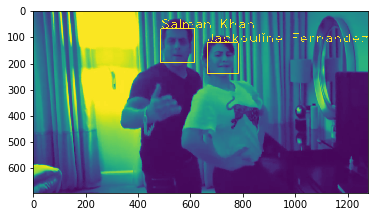

In [232]:
generate_box_and_name("/Users/abhinavrohilla/Desktop/Screen Shot 2018-09-25 at 3.20.14 PM.png",celebrities_in_pic)